# Tensorflow Tutorial

If you dont have Tensorflow installed, run the code below

In [ ]:
import pip
pip.main(['install','tensorflow'])

## Imports

In [1]:
import pickle
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

## Load data

In [26]:
mnist = input_data.read_data_sets("MNIST_data/", reshape=False,one_hot=True)
train_X, train_Y          = mnist.train.images, mnist.train.labels
validation_X, validation_Y = mnist.validation.images, mnist.validation.labels
test_X, test_Y            = mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [27]:
#Sanity check
assert(len(train_X) == len(train_Y))
assert(len(validation_X) == len(validation_Y))
assert(len(test_X) == len(test_Y))

In [28]:
#Print shapes
print("Shape of training images: ", train_X.shape)
print("Shape of training labels: ", train_Y.shape)
print("Shape of validation images: ", validation_X.shape)
print("Shape of validation lebels: ", validation_Y.shape)
print("Shape of test images: ", test_X.shape)
print("Shape of test labels: ", test_Y.shape)

Shape of training images:  (55000, 28, 28, 1)
Shape of training labels:  (55000, 10)
Shape of validation images:  (5000, 28, 28, 1)
Shape of validation lebels:  (5000, 10)
Shape of test images:  (10000, 28, 28, 1)
Shape of test labels:  (10000, 10)


*Training set : 55000 images*

*Validation Set : 5000 images*

*Test Set : 10000 images*

*Image Size : 28x28*

## Visualize

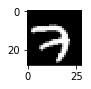

In [29]:
import random
%matplotlib inline

index = 0
image = train_X[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

## Flatten

In [30]:
train_X = np.reshape(train_X, (55000,784))
print("New Shape", train_X.shape) 

New Shape (55000, 784)


In [31]:
validation_X = np.reshape(validation_X, (5000,784))
print("New Shape", validation_X.shape) 

New Shape (5000, 784)


In [32]:
test_X = np.reshape(test_X, (10000,784))
print("New Shape", test_X.shape) 

New Shape (10000, 784)


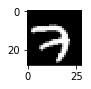

In [33]:
index = 0
image = train_X[index].reshape((28, 28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

## Normalize

We dont need to normalize since, it is already normalized.

## Create Placeholders

In [34]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32,[None, 10])

## Creating our Fully Connected neural network and Forward Propagation

784 - 500 - 10

*Relu->Softmax*

In [35]:

#Initialize weights
W1 = tf.get_variable("W1", [784,500], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [1,500], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [500,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [1,10], initializer = tf.zeros_initializer())

#Forward Propagation
Z1 = tf.add(tf.matmul(X,W1),b1)
A1 = tf.nn.relu(Z1)
Z2 = tf.add(tf.matmul(A1,W2),b2)
#We are not calculating A2 becuase we will be using tf.nn.softmax_cross_entropy_with_logits to 
#apply softmax and calculate loss directly

## Computing Cost

In [36]:
#Using softmax and computing the cost directly
#some read about tf.nn.softmax vs tn.nn.softmax_cross_entropy_with_logits
#https://stackoverflow.com/questions/34240703/whats-the-difference-between-softmax-and-softmax-cross-entropy-with-logits
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z2, labels = Y))

## Backpropagation with Adam(default beta1, beta2 and epsilon)

In [37]:
learning_rate=0.00001
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Function to create mini batches 

In [38]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (number of examples,input size,)
    Y -- true "label" vector 
    mini_batch_size - size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    #np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[ permutation, :].reshape((m, Y.shape[1]))
    
    #Split 
    row = 0
    to_row = mini_batch_size
    for i in range(1, int(m / mini_batch_size)+1):
        mini_batches.append((shuffled_X[row:to_row,:],shuffled_Y[row:to_row,:]))
        row = to_row
        to_row = mini_batch_size*(i+1)
        
       
        
        
    indicator = 0
    #if the size is not multiple of batch_size
    #print col
    if m % mini_batch_size != 0:
        mini_batches.append((X[row:m, :],Y[row:m, :]))
        indicator = 1
        
    #calculate no. of batches
    batches = int(m / mini_batch_size) + indicator
    
    '''
    print(shuffled_X.shape)
    index = 0
    image = shuffled_X[index].reshape((28, 28))

    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    '''
    
    return mini_batches

## Run the model

Cost after epoch 0: 137.298866
Cost after epoch 100: 7.059874
Cost after epoch 200: 3.363808
Cost after epoch 300: 1.734788
Cost after epoch 400: 0.869770
Cost after epoch 500: 0.407431
Cost after epoch 600: 0.175339
Cost after epoch 700: 0.069273
Cost after epoch 800: 0.024895
Cost after epoch 900: 0.008222


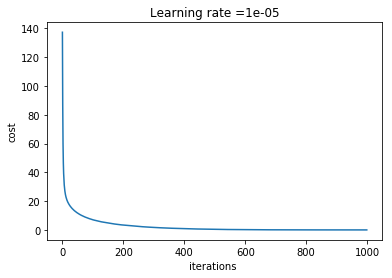

Parameters have been trained!
Train Accuracy: 1.0
Validation Accuracy: 0.9826
Test Accuracy: 0.9813


In [39]:
(n_x, m) = train_X.shape
minibatch_size = 128
costs = []
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}

#Initialize variables
init = tf.global_variables_initializer()
# Start the session to compute the tensorflow graph
    
with tf.Session() as sess:
        
    # Run the initialization
    sess.run(init)
    
    # Do the training loop
    for epoch in range(1000):
        epoch_cost = 0.                           # Defines a cost related to an epoch
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        minibatches = random_mini_batches(train_X, train_Y, minibatch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
              
            # IMPORTANT: The line that runs the graph on a minibatch.
            # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                
            epoch_cost += minibatch_cost / num_minibatches

        # Print the cost every epoch
        if epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        costs.append(epoch_cost)
            
    # lets save the parameters in a variable and dump it
    parameters = sess.run(parameters)
    pickle_out = open("deep_parameters.pickle", 'wb')
    pickle.dump(parameters,pickle_out)
    pickle_out.close()
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    print ("Parameters have been trained!")
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z2,1), tf.argmax(Y,1))

    # Calculate accuracy on the training set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: train_X, Y: train_Y}))
    print ("Validation Accuracy:", accuracy.eval({X: validation_X, Y: validation_Y}))
    print ("Test Accuracy:", accuracy.eval({X: test_X, Y: test_Y}))